In [2]:
#导入相关包
import pandas as pd
import numpy as np
from snownlp import SnowNLP #情感分析
import jieba
import pyLDAvis.gensim       #LDA可视化
import wordcloud             #词云
import os, codecs
import seaborn as sns
from pylab import mpl
import jieba.posseg as pseg
import matplotlib.pyplot as plt
from collections import Counter
from gensim import corpora,models

# 预处理

In [4]:
#导入数据
df=pd.read_csv('F:\现代科技农园.csv')
df1= df['text']
#df1.head()

In [5]:
#查询重复值
df1.duplicated().value_counts() 

False    1347
True       27
Name: text, dtype: int64

In [6]:
#处理重复值
df2= df1.drop_duplicates()
df2.duplicated().value_counts() 

False    1347
Name: text, dtype: int64

In [7]:
#去除短句，保留长度大于5的数据
df3 = df2[df2.str.len()>5]
df3 = df3.reset_index(drop=True)
data = df3.tolist()            #list形式

In [8]:
df3.head()

0    孩子喜欢去，里面很大，有小路，还有假山，以前去过很多次都没发现，景区里有一些荒废的景点，小桥...
1                    玩得很开心风景很优美很可以感受一下＃采摘的乐趣总而言之很满意的一次
2    空气很好，环境也不错，去的时候阴天，所以不是很热，要是晴天话估计可能会热，地方很大，有农家院...
3                     很好，景区很大，又采摘了很多葡萄，味道比市场好多了，10元一斤，
4    天然氧吧 空气非常好 孩子去了也非常喜欢 还买了许多水果 葡萄非常甜 而且孩子可以在那里体验...
Name: text, dtype: object

# 分词

In [11]:
def load_stopword():
    '''
    加载停用词表
    :return: 返回停用词的列表
    '''
    f_stop = open('E:\课程相关\大三下\综合课程设计\stopWord.txt','r',encoding='UTF-8')
    sw = [line.strip() for line in f_stop]
    f_stop.close()
    sw.append('\n')
    return sw

<>:6: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \s
<ipython-input-11-4c5bede52888>:6: DeprecationWarning: invalid escape sequence \s
  f_stop = open('E:\课程相关\大三下\综合课程设计\stopWord.txt','r',encoding='UTF-8')


In [13]:
stopwords = load_stopword()  #加载停用词表
jieba.load_userdict("E:\课程相关\大三下\综合课程设计\dict.txt")  #自定义字典
text_list = []
cloud_text = ''
c = Counter()
for i in range(len(df3)):
    seg_list = jieba.posseg.cut(df3[i])
    mytext_list=[]
    for x in seg_list:
        if len(x.word)>1 and x.word != '\r\n' and x.word not in stopwords and x.flag =='n':   #x.flag =='n'表示只保留名词
            c[x.word] += 1
            mytext_list.append(x.word.replace(" ",""))
    text_list.append(mytext_list)      
    cloud_text+=",".join(mytext_list)  #绘制词云
print('词频度统计结果')
for (k,v) in c.most_common(10):
    print('{}:{}'.format(k,v))

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-13-c28050539b20>:2: DeprecationWarning: invalid escape sequence \d
  jieba.load_userdict("E:\课程相关\大三下\综合课程设计\dict.txt")  #自定义字典


词频度统计结果
孩子:214
菊花:202
农业:105
品种:105
门票:99
植物:95
小朋友:95
环境:93
蔬菜:79
游玩:75


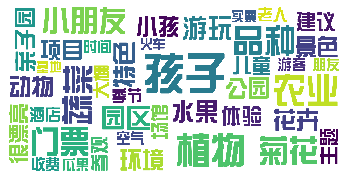

In [14]:
#创建词云
font = "C:\\Windows\\Fonts\\HGZY_CNKI.TTF"#词云的中文字体所在路径
wc = wordcloud.WordCloud(
    scale = 7,
    background_color="white", #背景颜色
    #max_words=200, #显示最大词数
    font_path=font,
    min_font_size=15,
    max_font_size=50, 
    width=400  #图幅宽度
    )
wc.generate(cloud_text)

plt.imshow(wc)
plt.axis("off")
plt.show()

# LDA主题分析

In [16]:
# 主题分析
text_dict = corpora.Dictionary(text_list) # 创建语料的词语词典，每个单独的词语都会被赋予一个索引
text_corpus = [text_dict.doc2bow(i) for i in text_list] #创建语料库
tfidf = models.TfidfModel(text_corpus)
corpus_tfidf = tfidf[text_corpus]

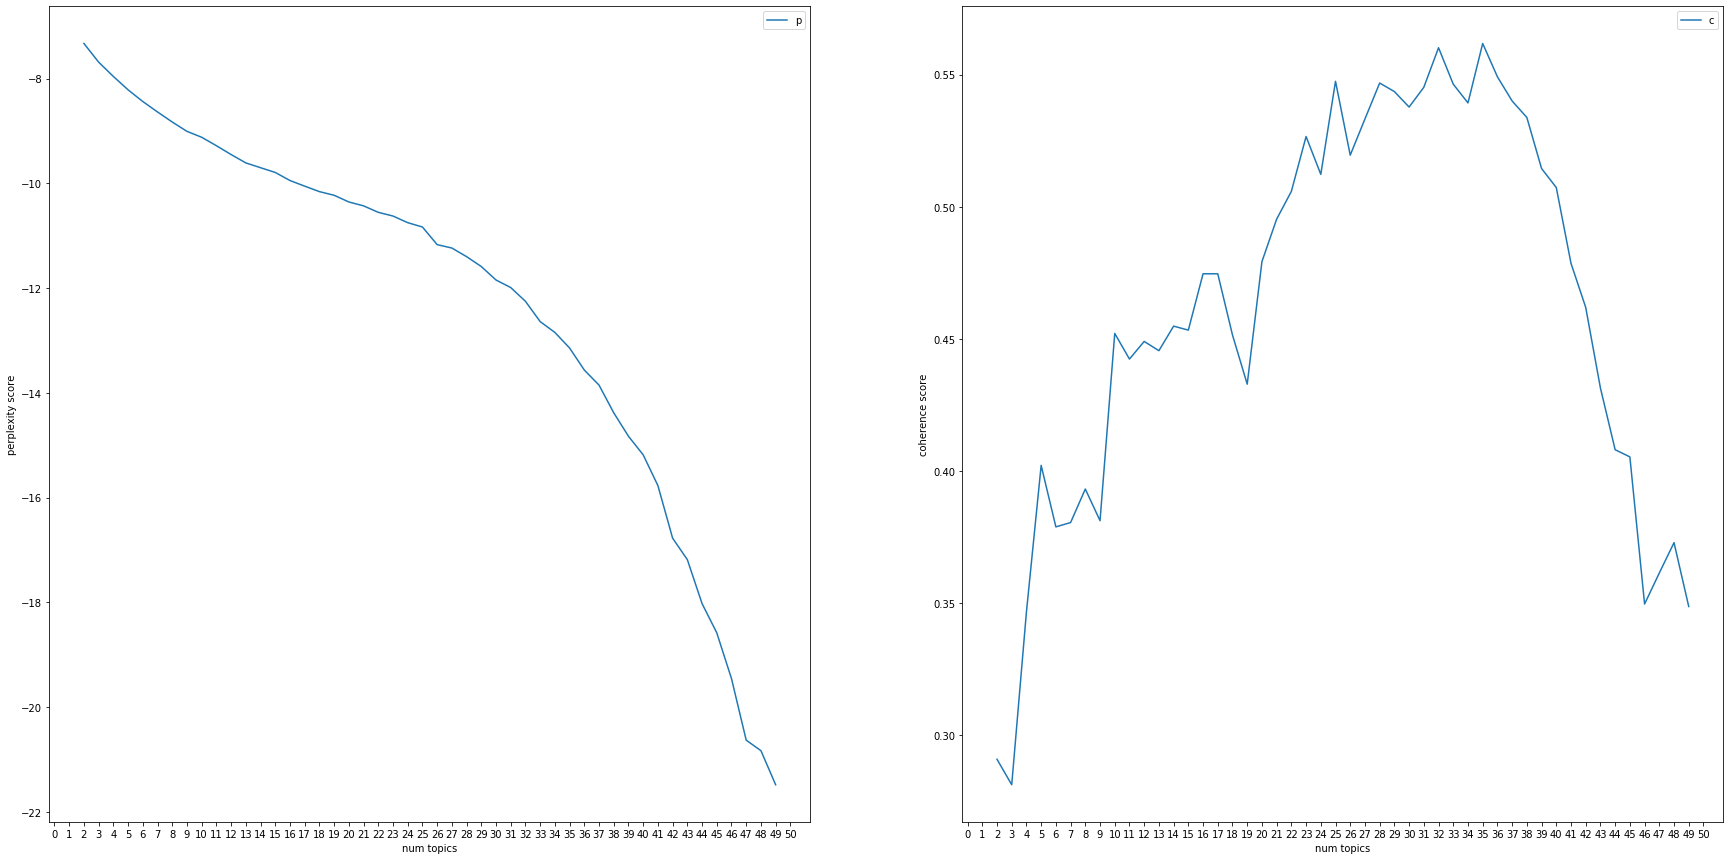

In [17]:
#模型评估：困惑度 &一致度
x_list = []
y_plist =[]
y_clist =[]
for i in range(2,50):
    text_lda = models.LdaModel(corpus_tfidf,num_topics = i,id2word =text_dict ) # LDA模型训练
    #困惑度
    perplexity = text_lda.log_perplexity(corpus_tfidf)  
    #一致度
    cv_tmp = models.CoherenceModel(model=text_lda,texts=text_list, dictionary=text_dict, coherence='c_v')
    x_list.append(i)
    y_plist.append(perplexity)
    y_clist.append(cv_tmp.get_coherence())
#困惑度绘图    
plt.figure(figsize=(30,15))    
plt.subplot(1,2,1)
plt.plot(x_list,y_plist)
plt.xticks(np.linspace(0, 50, 51))
plt.xlabel('num topics')
plt.ylabel('perplexity score')
plt.legend(('perplexity_values'), loc='best')
#一致度绘图
plt.subplot(1,2,2)
plt.plot(x_list,y_clist)
plt.xticks(np.linspace(0, 50, 51))
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')

plt.show()

In [13]:
#根据以上模型评估结果分析最优主题数目

In [20]:
#最优主题数目下的LDA主题模型
n = 25
lda = models.LdaModel(text_corpus,num_topics =n,id2word =text_dict ) # LDA模型训练  该最优主题数为32
for i in range(n):
    print('topic' + str(i))
    print(lda.print_topic(i)) # 输出每个主题

topic0
0.046*"菊花" + 0.025*"参观" + 0.023*"种类" + 0.021*"很漂亮" + 0.018*"现代农业" + 0.018*"公园" + 0.018*"游玩" + 0.018*"环境" + 0.018*"植物" + 0.016*"品种"
topic1
0.046*"小朋友" + 0.035*"植物" + 0.021*"季节" + 0.021*"公园" + 0.021*"香蕉" + 0.018*"设施" + 0.018*"动物" + 0.018*"国家" + 0.014*"瓜果" + 0.014*"票价"
topic2
0.085*"孩子" + 0.029*"小朋友" + 0.019*"动物" + 0.019*"公园" + 0.014*"亲子园" + 0.014*"家长" + 0.014*"美景" + 0.014*"景色" + 0.010*"玩玩" + 0.010*"老人"
topic3
0.033*"农业" + 0.033*"菊花" + 0.025*"小孩子" + 0.018*"体验" + 0.015*"景色" + 0.015*"风景区" + 0.011*"设施" + 0.011*"蔬菜" + 0.011*"国家" + 0.011*"特色"
topic4
0.027*"门票" + 0.023*"植物" + 0.022*"孩子" + 0.017*"游玩" + 0.016*"买票" + 0.015*"农业" + 0.014*"盆友" + 0.013*"蔬菜" + 0.013*"价格" + 0.013*"套票"
topic5
0.028*"植物" + 0.026*"门票" + 0.022*"园区" + 0.021*"特色" + 0.018*"品种" + 0.015*"公园" + 0.015*"场馆" + 0.013*"天气" + 0.012*"农业" + 0.012*"展馆"
topic6
0.032*"项目" + 0.025*"门票" + 0.023*"孩子" + 0.019*"小孩" + 0.017*"小朋友" + 0.016*"游乐" + 0.016*"交通" + 0.015*"动物" + 0.015*"亲子园" + 0.013*"公园"
topic7
0.114*"孩子" + 0.048*"菊花" + 0.027*"品种" +

In [15]:
#可视化模型，帮助理解主题
#vis_data = pyLDAvis.gensim.prepare(lda, text_corpus,text_dict)
#pyLDAvis.show(vis_data, open_browser=False)

In [21]:
#得到每个文档（每评论文本）的主导主题
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [22]:
#文档中贡献百分比最高的主题
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=text_corpus, texts=data)# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']# Show
df_dominant_topic.head(10)
#df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.8080,"孩子, 菊花, 品种, 游玩, 环境, 价格, 大人, 草莓, 蔬菜, 植物",孩子喜欢去，里面很大，有小路，还有假山，以前去过很多次都没发现，景区里有一些荒废的景点，小桥...
1,1,13.0,0.5200,"风景, 花卉市场, 小吃, 整体, 菊花, 餐厅, 亲子, 农家菜, 设施, 现场",玩得很开心风景很优美很可以感受一下＃采摘的乐趣总而言之很满意的一次
2,2,2.0,0.8080,"孩子, 小朋友, 动物, 公园, 亲子园, 家长, 美景, 景色, 玩玩, 老人",空气很好，环境也不错，去的时候阴天，所以不是很热，要是晴天话估计可能会热，地方很大，有农家院...
3,3,10.0,0.7600,"环境, 草莓, 园区, 小朋友, 水果, 亲子, 味道, 植物, 菊花, 孩子",很好，景区很大，又采摘了很多葡萄，味道比市场好多了，10元一斤，
4,4,24.0,0.8800,"植物, 孩子, 小朋友, 门票, 蔬菜, 体验, 现场, 很漂亮, 农业, 葡萄",天然氧吧 空气非常好 孩子去了也非常喜欢 还买了许多水果 葡萄非常甜 而且孩子可以在那里体验...
5,5,8.0,0.8080,"孩子, 时间, 蔬菜, 季节, 排队, 块钱, 老人, 参观, 生态, 农业",一直都想来看看，今天终于来了，很好。我还买了好多的绿色食品呢，葡萄，苦瓜，市子，好吃
6,6,14.0,0.8400,"菊花, 棒棒, 孩子, 品种, 小朋友, 时间, 动物, 小孩, 门票, 收费",这次北大荒之行，看到了园内，果实累累，长长的丝瓜，圆圆的窝瓜，重重的冬瓜，采载了葡萄，孩子非...
7,7,7.0,0.5200,"孩子, 菊花, 品种, 游玩, 环境, 价格, 大人, 草莓, 蔬菜, 植物",已经去过2次啦，每次宝贝玩的都很开心，推荐带宝贝的去很不错，里面卖的蔬菜水果也很新鲜，满赞
8,8,23.0,0.7600,"孩子, 菊花, 品种, 环境, 植物, 游玩, 体验, 亲子, 设施, 蔬菜",总的来说很不错，能看到很多现代农业的产物，大开眼界，类似的生态园我也去过，相比之下，北大荒还...
9,9,10.0,0.6597,"环境, 草莓, 园区, 小朋友, 水果, 亲子, 味道, 植物, 菊花, 孩子",园内景点出乎意料的好，有好多没有见过的植物，水果，植物的果实硕果累累，园内还有很多适合小朋友...


In [23]:
len(df_dominant_topic)

1338

# 通过可视化模型以及每个主题的主导文档手动合并几个主题，然后再进行下一步（情感分析）

In [26]:
df_dominant_topic['Topic'] = None
df_dominant_topic.Topic[df_dominant_topic.Dominant_Topic.isin([1,2,3,6,7,11,20,22,23])] = '亲子体验'
df_dominant_topic.Topic[df_dominant_topic.Dominant_Topic.isin([0,8,9,10,16,17,19])] = '观赏感受'
df_dominant_topic.Topic[df_dominant_topic.Dominant_Topic.isin([4,14,15])] = '农园门票'
df_dominant_topic.Topic[df_dominant_topic.Dominant_Topic.isin([12,13,16,17,18,21,24])] = '科技产业'
df_dominant_topic.fillna('others',inplace = True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCo

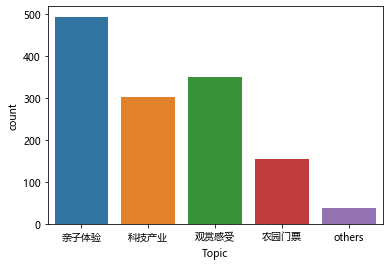

In [27]:
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
sns.countplot(df_dominant_topic['Topic'])

#  情感分析

In [28]:
Attitude = []    
for i, v in df_dominant_topic['Text'].iteritems():
    s = SnowNLP(v)
    Attitude.append(s.sentiments)
df_dominant_topic['Attitude'] = Attitude

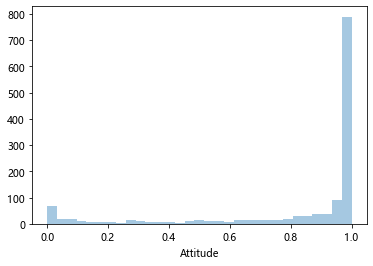

In [29]:
#所有主题的情感倾向分布情况
sns.distplot(df_dominant_topic['Attitude'],kde = False)

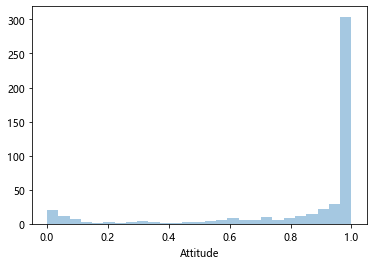

In [32]:
#某个主题的情感倾向分布情况-自然风景
sns.distplot(df_dominant_topic[df_dominant_topic['Topic']=='亲子体验']['Attitude'],kde = False)# 主题35的情感倾向

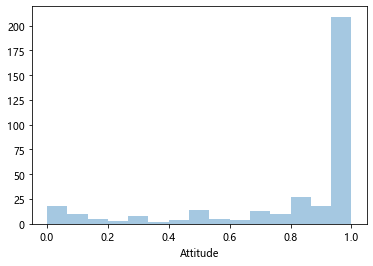

In [33]:
#某个主题的情感倾向分布情况-人文环境
sns.distplot(df_dominant_topic[df_dominant_topic['Topic']=='观赏感受']['Attitude'],kde = False)# 主题35的情感倾向

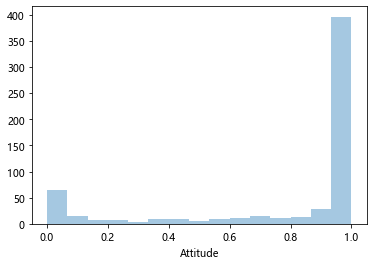

In [193]:
#某个主题的情感倾向分布情况-用户体验
sns.distplot(df_dominant_topic[df_dominant_topic['Topic']=='农园门票']['Attitude'],kde = False)# 主题35的情感倾向

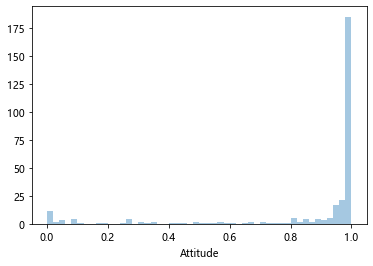

In [34]:
#某个主题的情感倾向分布情况-民俗文化
sns.distplot(df_dominant_topic[df_dominant_topic['Topic']=='科技产业']['Attitude'],kde = False)# 主题35的情感倾向

In [195]:
#df_dominant_topic.groupby('Dominant_Topic')['Attitude'].mean().plot(kind = 'bar')

In [26]:
#找到给定主题最有贡献的文档，并通过阅读该文档来推断该主题
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],  axis=0)# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9640,"风景, 很漂亮, 名字, 观景台, 路线, 木屋, 韵味, 特色, 门票, 美景",春天的甲居是宁静的，却又像那株艳丽的桃花一样，蕴含热情的。在茫茫大山中仍然鲜艳夺目。\n\n...
1,1.0,0.9696,"图片, 后裔, 前厅, 导游, 建筑, 房屋, 特色, 风貌, 市区, 有点",因为在西安看了长恨歌，给出极度震撼的感受，所以到了平遥，自然要看看又见平遥的演出。结果真的非...
2,2.0,0.9611,"特色, 收费, 故事, 门票, 风景, 性价比, 脚步, 风味, 特地, 住宅",坝美村位于云南省文山州广南县北部八达乡和阿科乡交界处，村子四面环山，进出寨子以前主要靠村前村...
3,3.0,0.9793,"建筑, 特色, 韵味, 特点, 大堂, 味道, 牌坊, 痕迹, 博物馆, 历史",到西递逛景点，\n随意走走到头就是这个牌坊。\n看牌坊周围正好有学校搞活动，\n年轻的学生们...
4,4.0,0.9751,"游客, 条件, 山顶, 角度, 山水画, 气息, 木头, 朋友, 门票, 日子",西江千户苗寨真是让人极端失望的景点。人在这里连最基本的安全体验都非常差，演出场旁边就是路边就...
5,5.0,0.9939,"门楼, 门票, 建筑, 特色, 博物馆, 古迹, 历史, 房屋, 文化, 游客",安徽西递仅存的牌坊，距今400多年历史，主人是唐朝皇室后裔。安徽西递和宏村两个古村落早在20...
6,6.0,0.9665,"古色古香, 夜景, 码头, 味道, 民间, 体验, 农家菜, 项目, 回家, 环境",甲居藏寨是最具嘉绒藏族风情的村寨之一。这里有田园牧歌式的优美画卷，蓝天白云下，一幢幢色彩艳丽...
7,7.0,0.9665,"森林公园, 景色, 感觉, 特色, 门票, 收费, 游客, 博物馆, 酒店, 小船",肇兴侗寨的鼓楼有新旧之分，旧鼓楼是原来每个团的鼓楼，共有5个，分别是仁团鼓楼、礼团鼓楼、义团...
8,8.0,0.9757,"格局, 文化, 游人, 门票, 石板, 旅游景点, 体会, 导游, 艺术, 人气",如果你过几天安静的生活，又不想去游人如织的古镇话，肇兴侗寨是个不错的选择。这边虽然有一定的程...
9,9.0,0.9763,"聚宝盆, 特色, 感觉, 故事, 湖面, 时间, 景色, 布置, 房子, 门票",国内摩洛哥 | 来这个火爆新疆的民俗村就能体验异域风情！\n\n新疆-伊宁-喀赞其民俗村\n...


In [31]:
#主题的数量和分布
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,18.0,"博物馆, 大户人家, 民间, 时间, 历史, 文化, 后人, 建筑, 故居, 经典",380.0,0.0969
1,16.0,"玻璃, 体验, 排队, 感觉, 图片, 文化, 水域, 买票, 有点, 饭店",69.0,0.0176
2,16.0,"玻璃, 体验, 排队, 感觉, 图片, 文化, 水域, 买票, 有点, 饭店",75.0,0.0191
3,32.0,"风景, 感觉, 游人, 村落, 历史, 时间, 美誉, 门票, 环线, 乡村",62.0,0.0158
4,1.0,"图片, 后裔, 前厅, 导游, 建筑, 房屋, 特色, 风貌, 市区, 有点",66.0,0.0168
5,25.0,"博物馆, 陶瓷, 门票, 特色, 特点, 小时, 参观, 牌坊, 民俗, 宅院",157.0,0.0400
6,13.0,"特色, 景色, 距离, 体验, 大片, 空气, 餐饮, 院子, 味道, 感觉",63.0,0.0161
7,26.0,"门票, 宅子, 参观, 特色, 小吃, 砖雕, 天气, 建筑, 风景, 景色",121.0,0.0309
8,8.0,"格局, 文化, 游人, 门票, 石板, 旅游景点, 体会, 导游, 艺术, 人气",91.0,0.0232
9,5.0,"门楼, 门票, 建筑, 特色, 博物馆, 古迹, 历史, 房屋, 文化, 游客",149.0,0.0380
